# Complete Notebook
## Module Loader

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import StandardScaler
sns.set()
%matplotlib inline

## Analysis (General)
### Dataloader

In [3]:
path = r"data\train.csv"
X_raw = pd.read_csv(path, index_col="Id")
X_ana = X_raw.copy()
X_test = pd.read_csv(path, index_col ="Id")
print(X_raw.columns)


Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'Wo

### General analysis

**The Problem:**  
We want to predict houseprices based on several parameters of different segments.

Steps:  
A. Read the docs and get information about the dataset, its gathering and the environment of the dataset  
B. Analyse column by columns and make information about Type, Segment, Expected Importance  
C. Test the assumptions with box / scatter plots  
D. Write down consolidated information about importance  



A. Dataset information
Unfortunately no additional information were provided within the competition  
  
B. Analysis of every column
After revising every column and its describtion from the data_description.csv-file I have segmented and prioritized the different variabels.  
The most important ones form my perspective are:  
* LotArea
* Utilities
* Neighborhood
* BldgType
* OverallQual
* OverallCond
* TotalBsmtSF
* 1stFlrSF
* GrLivArea
* FullBath
* BedroomAbvGr
* TotRmsAbvGrd
* GarageArea

Next I will try to verify this assumptions with a correlation analysis

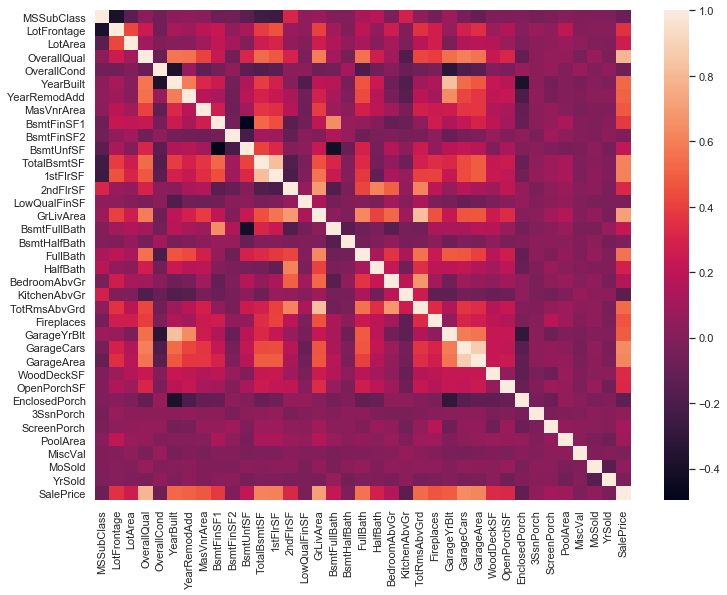

['OverallQual' 'GrLivArea' 'GarageCars' 'GarageArea' 'TotalBsmtSF'
 '1stFlrSF' 'FullBath' 'TotRmsAbvGrd' 'YearBuilt' 'YearRemodAdd'
 'GarageYrBlt' 'MasVnrArea' 'Fireplaces' 'BsmtFinSF1' 'LotFrontage'] ['BsmtFullBath' 'BsmtUnfSF' 'BedroomAbvGr' 'ScreenPorch' 'PoolArea'
 'MoSold' '3SsnPorch' 'BsmtFinSF2' 'BsmtHalfBath' 'MiscVal' 'LowQualFinSF'
 'YrSold' 'OverallCond' 'MSSubClass' 'EnclosedPorch']


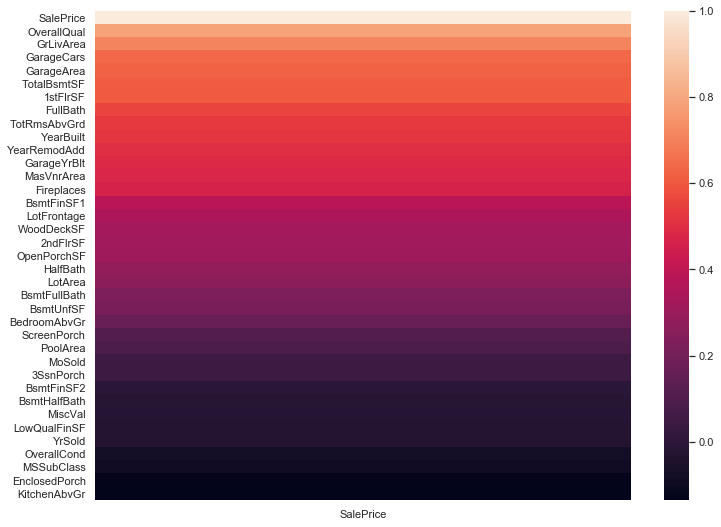

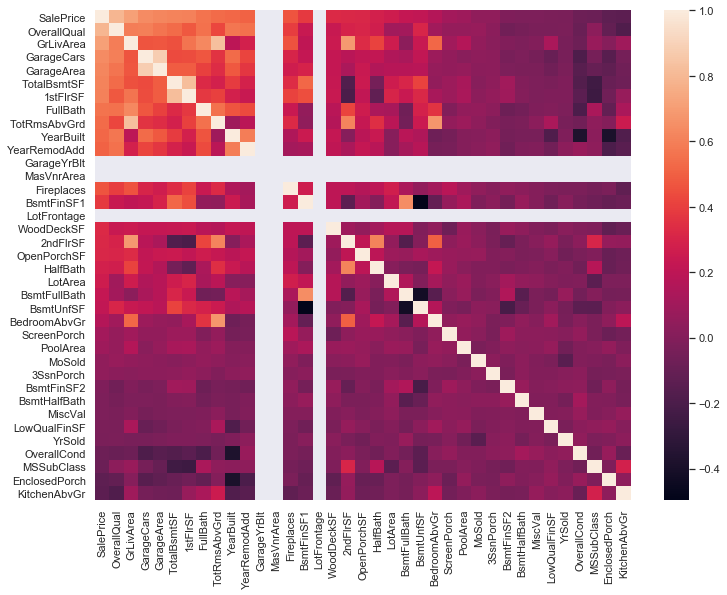

In [74]:
corrmat = X_ana.corr()
fig, ax = plt.subplots(figsize=(12, 9))
ax1 = sns.heatmap(corrmat)
plt.show()
fig2, _ =plt.subplots(figsize=(12,9))
ax2 = sns.heatmap(corrmat.iloc[:, -1:].nlargest(100, corrmat.columns[-1]))
fig3, _ = plt.subplots(figsize=(12,9))
cols = corrmat.nlargest(100, "SalePrice")["SalePrice"].index
cm = np.corrcoef(X_ana[cols].values.T)
ax3 = sns.heatmap(cm, cbar=True, xticklabels=cols.values, yticklabels=cols.values)
print(cols.values[1:16], cols.values[-16: -1])


The Top 15 most correlated columns according to this correlation analysis are  
'OverallQual'  
'GrLivArea'  
'GarageCars'  
'GarageArea'  
'TotalBsmtSF'  
'1stFlrSF'  
'FullBath'  
'TotRmsAbvGrd'  
'YearBuilt'  
'YearRemodAdd'  
'GarageYrBlt'  
'MasVnrArea'  
'Fireplaces'  
'BsmtFinSF1'  
'LotFrontage'   

The 15 least correlated columns according to this correlation analysis are  
'BsmtUnfSF'  
'BedroomAbvGr'  
'ScreenPorch'  
'PoolArea'  
'MoSold'  
'3SsnPorch'   
'BsmtFinSF2'  
'BsmtHalfBath'  
'MiscVal'  
'LowQualFinSF'  
'YrSold'    
'OverallCond'   
'MSSubClass'   
'EnclosedPorch'    

All others will be classified as Medium 

This insights results in an change of the potential importance of the features in the columns analysis, stated now in the Correlation column


### SalePrice - Analysis of the dependent variable  
  
SalePrice will be the predicted variable. Let's take a look on it

In [75]:
print(X_ana.SalePrice.describe())

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64


looks like no 0 values (very good), positive skewness(not so good), some big ones at the end.  
Taking a picture of it including a normal dist to compare:

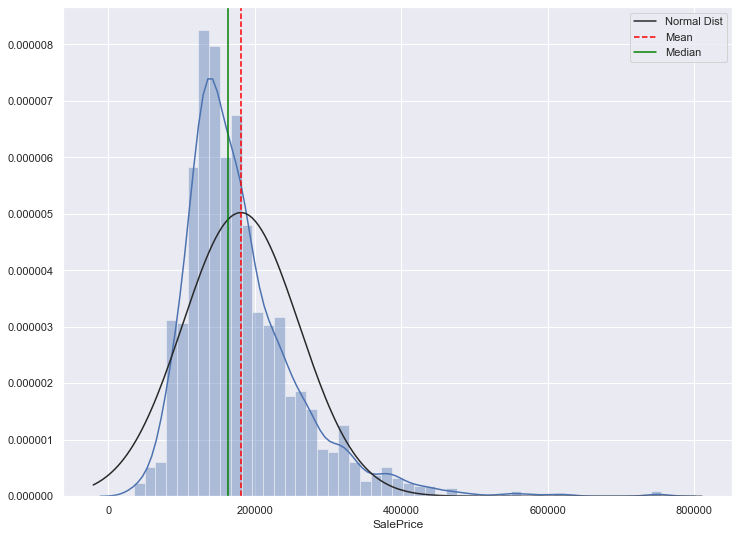

In [96]:
fig, ax_dist = plt.subplots(figsize=(12,9), sharex=True)
mean = X_ana.SalePrice.mean()
median = X_ana.SalePrice.median()
sns.distplot(X_ana.SalePrice, fit=stats.norm, ax = ax_dist)
ax_dist.axvline(mean, color="red", linestyle="--")
ax_dist.axvline(median, color="green", linestyle = "-")
plt.legend({"Normal Dist":stats.norm, "Mean":mean, "Median":median})

Looks like a  
* deviation from normal   
* including high peak  
* with positive skewness  
* and outliers on the right (potentially above 700000).   

Measurements in numbers: 

In [84]:
print("Peakness (Kurtosis): %f" % X_ana.SalePrice.kurt())
print("Skewness: %f" % X_ana.SalePrice.skew())

Peakness (Kurtosis): 6.536282
Skewness: 1.882876


### Further Analysis

In [ ]:
X = X_raw.copy()
X.dropna(subset=["SalePrice"], axis=0, inplace=True)
#X.dropna(axis=1, inplace = True)
y = X.SalePrice
X.drop("SalePrice", axis=1, inplace=True)

print(X.head())
print(X.info())
print(X.describe())

col_obj = X.select_dtypes(include=["object", "bool"]).columns
col_obj_above_10 = list([col for col in col_obj if X[col].nunique() > 15])
col_obj_below_10 = list(set(col_obj)-set(col_obj_above_10))
col_num = X.select_dtypes(exclude=["object", "bool"]).columns.values
col_with_nan = [col for col in X.columns if X[col].isna().any()]


print("Summary:\n")
print("Number of columns: {}".format(len(X.columns)))
print("Number of object columns: {}".format(len(col_obj)))
print("Number of columns with NaNs: {}".format(len(col_with_nan)))
print("Number of object columns with NaNs: {}".format(len(set(col_with_nan)-set(col_num))))
print("Number of numeric columns with NaNs: {}".format(len(set(col_with_nan)-set(col_obj))))

y.plot(kind="hist")
plt.show()
%matplotlib inline
y.plot()

The 

## Pipeline and predictor

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Lars, ElasticNet
from sklearn.svm import SVR
from sklearn.ensemble import AdaBoostRegressor
from sklearn.neural_network import MLPRegressor
from xgboost import XGBRegressor
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer, TransformedTargetRegressor
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.decomposition import PCA
from sklearn.metrics import mean_absolute_error



### Building the pipeline

In [ ]:
res= {}
np.random.seed(1)

In [ ]:

#reg = ElasticNet()

X_train, X_valid, y_train, y_valid = train_test_split( X, y, train_size = 0.8, test_size=0.2, random_state=0)
reg = XGBRegressor(evals=([X_valid, y_valid]), eval_metric="mae", cv=True, seed=0 )


#numeric_transformer = Pipeline(["imputer",SimpleImputer(strategy="median")])



#raising value error due to lack in synchronization caused by OneHotEncoder and OrdinalEncoder
preprocessing = ColumnTransformer(transformers=[("numeric", SimpleImputer(strategy = "median"), col_num) ,
                                            ("obj_below_10", Pipeline([("obj_imputer1", SimpleImputer(strategy = "most_frequent")),
                                                                        ("OHE"            , OneHotEncoder(handle_unknown='ignore'
                                                                                                            ))
                                                                        ]), col_obj_below_10) ,
                                            ("Neighborhood_", Pipeline([("obj_imputer2", SimpleImputer(strategy = "most_frequent")),
                                                                        ("label_encoder"  , OrdinalEncoder(categories=[list(X["Neighborhood"].unique())])
                                                                                                            )
                                                                        ]), ["Neighborhood"]),
                                            ("Exterior_2nd", Pipeline([("obj_imputer2", SimpleImputer(strategy = "most_frequent")),
                                                                        ("label_encoder"  , OrdinalEncoder(categories=[list(X["Exterior2nd"].unique())]))
                                                                        ]), ["Exterior2nd"])], remainder='drop')


my_pipe = Pipeline([("preprocessing",preprocessing),
                     #("pca", PCA(n_components = 35)),
                     ("std_scaler", StandardScaler()),
                     ("reg",reg)])


param_grid = {  #"preprocessing__numeric__strategy":["median", "mean"],
                #"pca__n_components": np.linspace(25, 65, 5, dtype="int"),
                "reg__early_stopping_counts": [50],
                "reg__n_estimators": [342],
                "reg__learning_rate":[0.04002371183530562],
                "reg__max_depth": [5],
                "reg__min_child_weight": [1.02],
                "reg__gamma":[0],
                "reg__subsample":[0.8264488486588846],
                "reg__colsample_bytree": [0.551988011711525],
                "reg__alpha":[0.107],
                
                }
cv = 5

search = GridSearchCV(my_pipe, param_grid=param_grid, scoring="neg_mean_absolute_error", verbose=10, n_jobs=-2, cv = cv, return_train_score=True)
search.fit(X_train,y_train)
print(abs(search.best_score_))
search_pred = search.predict(X_valid)
search_score = mean_absolute_error(y_valid, search_pred)
print(search.best_params_)

res[search.best_score_] = search.best_params_

test_preds = search.predict(X_test)
output = pd.DataFrame({"Id": X_test.index,
                     "SalePrice": test_preds})
output.to_csv("submission_other.csv", index=False)

In [ ]:
subsample= 0.8265340078198108
subsample=0.8264608951160635
subsample_best = 0.8264488486588846
colsample_0 = 0.5519746590351778
colsample_best= 0.551988011711525
n_est = 349
n_est = 343
print(np.random.normal(0.8265340078198108, 0.001, 20))

In [ ]:
np.random.normal(0.5510204081632653, 0.1,20)


Choose a relatively high learning rate. Generally a learning rate of 0.1 works but somewhere between 0.05 to 0.3 should work for different problems. Determine the optimum number of trees for this learning rate. XGBoost has a very useful function called as “cv” which performs cross-validation at each boosting iteration and thus returns the optimum number of trees required.
Tune tree-specific parameters ( max_depth, min_child_weight, gamma, subsample, colsample_bytree) for decided learning rate and number of trees. Note that we can choose different parameters to define a tree and I’ll take up an example here.
Tune regularization parameters (lambda, alpha) for xgboost which can help reduce model complexity and enhance performance.
Lower the learning rate and decide the optimal parameters .


from sklearn.compose import Tar

#reg = XGBRegressor(early_stopping_counts=5, eval_stop=([X_valid, y_valid]) )
reg = ElasticNet()

X_train, X_valid, y_train, y_valid = train_test_split( X, y, train_size = 0.8, test_size=0.2, random_state=0)



#numeric_transformer = Pipeline(["imputer",SimpleImputer(strategy="median")])



#raising value error due to lack in synchronization caused by OneHotEncoder and OrdinalEncoder
preprocessing = ColumnTransformer(transformers=[("numeric", SimpleImputer(strategy = "median"), col_num) ,
                                            ("obj_below_10", Pipeline([("obj_imputer1", SimpleImputer(strategy = "most_frequent")),
                                                                        ("OHE"            , OneHotEncoder(handle_unknown='ignore'
                                                                                                            ))
                                                                        ]), col_obj_below_10) ,
                                            ("Neighborhood_", Pipeline([("obj_imputer2", SimpleImputer(strategy = "most_frequent")),
                                                                        ("label_encoder"  , OrdinalEncoder(categories=[list(X["Neighborhood"].unique())])
                                                                                                            )
                                                                        ]), ["Neighborhood"]),
                                            ("Exterior_2nd", Pipeline([("obj_imputer2", SimpleImputer(strategy = "most_frequent")),
                                                                        ("label_encoder"  , OrdinalEncoder(categories=[list(X["Exterior2nd"].unique())]))
                                                                        ]), ["Exterior2nd"])], remainder='drop')


my_pipe = Pipeline([("preprocessing",preprocessing),
                     ("pca", PCA(n_components = 42)),
                     ("reg",reg)])


param_grid = {  #"preprocessing__numeric__strategy":["median", "mean"],
                "pca__n_components": np.linspace(25, 65, 10, dtype="int"),
                #"reg__n_estimators": np.linspace(100, 1000, 20, dtype="int"),
                "reg__alpha":np.linspace(.01,1.5,50),
                "reg__l1_ratio": np.linspace(.2, .8, 10)
                }
cv = 5

search = GridSearchCV(my_pipe, param_grid=param_grid, scoring="neg_mean_absolute_error", verbose=5, n_jobs=-2, cv = cv)
search.fit(X_train,y_train)
print(abs(search.best_score_))
search_pred = search.predict(X_valid)
search_score = mean_absolute_error(y_valid, search_pred)
print(search.best_params_)

reg = ElasticNet(alpha=.253265, l1_ratio=0.66666666)
my_pipe = Pipeline([("preprocessing",preprocessing),
                     ("pca", PCA(n_components = 42)),
                     ("reg",reg)])
my_pipe.fit(X_train, y_train)
y_pred = my_pipe.predict(X_valid)
score = mean_absolute_error(y_valid, y_pred)
print(score)

rfr, lars, elnet, svr, ada, mlpr, xgbr = RandomForestRegressor(), LassoLars(), ElasticNet(), SVR(), AdaBoostRegressor(), MLPRegressor(), XGBRegressor()

model_instances = [rfr, lars, elnet, svr, ada, mlpr, xgbr]
rfr_list =["n_estimators"]
rfr_list.append(np.linspace(10, 200, 10, dtype="int"))
lars_list = ["alpha"]
lars_list.append(np.linspace(.01, .2, 10))
elnet = 

models = {}
grids = []
print(rfr_list)